# **Customer Churn Analysis and Prediction**


#### The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.




### **Task 1: Data Preparation**

In [1]:
# Importing the Data from Drive

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Datasets/SaiKet Systems/Telco_Customer_Churn_Dataset  (3).csv')
df.head(5)

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
(df['TotalCharges']==" ").sum()

np.int64(11)

In [6]:
# Handling Missing Values

import numpy as np
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan).astype(float)
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'].dtype)
print((df['TotalCharges']==" ").sum())

float64
0


In [7]:
# Encoding Categorical Variables

df=df.drop('customerID',axis=1)
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})
df_encoded=pd.get_dummies(df,drop_first=True,dtype=int)
df_encoded

/tmp/ipython-input-1463462179.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'Yes':1,'No':0})


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
# Splitting into Training & Testing Sets

from sklearn.model_selection import train_test_split

x=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print("Train set:",x_train.shape)
print("Train set:",x_test.shape)

Train set: (5634, 30)
Train set: (1409, 30)


### **Task 2: Exploratory Data Analysis (EDA)**

Overall Churn Rate: 26.54%


/tmp/ipython-input-128186940.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn",data=df,palette=["skyblue", "salmon"])


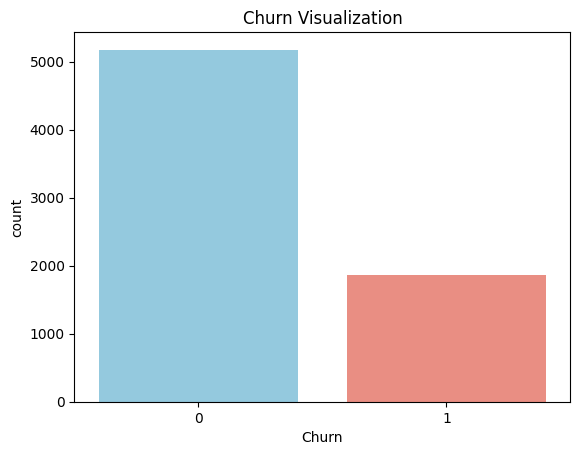

In [9]:
# Overall Churn Rate

import matplotlib.pyplot as plt
import seaborn as sns

churn_rate=df['Churn'].mean()*100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Visualizing it

sns.countplot(x="Churn",data=df,palette=["skyblue", "salmon"])
plt.title("Churn Visualization")
plt.show()

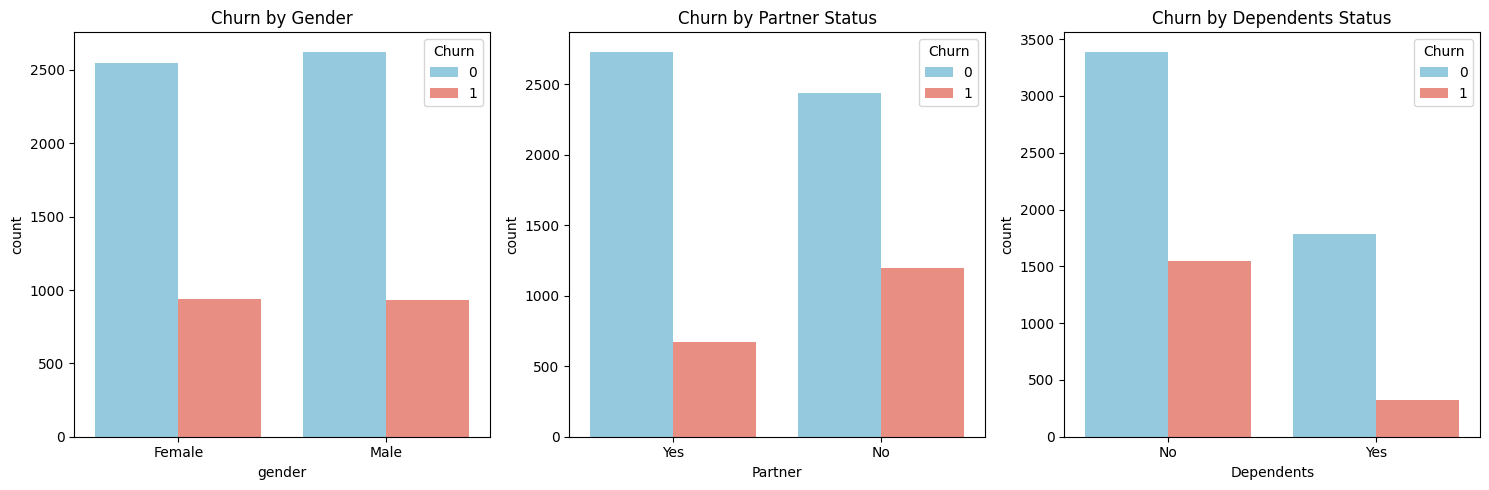

In [10]:
# Customer distribution by gender, partner status, and dependent status

fig,axes=plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='gender',hue='Churn',data=df,ax=axes[0],palette=["skyblue", "salmon"])
axes[0].set_title("Churn by Gender")

sns.countplot(x='Partner',hue='Churn',data=df,ax=axes[1],palette=["skyblue", "salmon"])
axes[1].set_title("Churn by Partner Status")

sns.countplot(x='Dependents',hue='Churn',data=df,ax=axes[2],palette=["skyblue", "salmon"])
axes[2].set_title("Churn by Dependents Status")

plt.tight_layout()
plt.show()

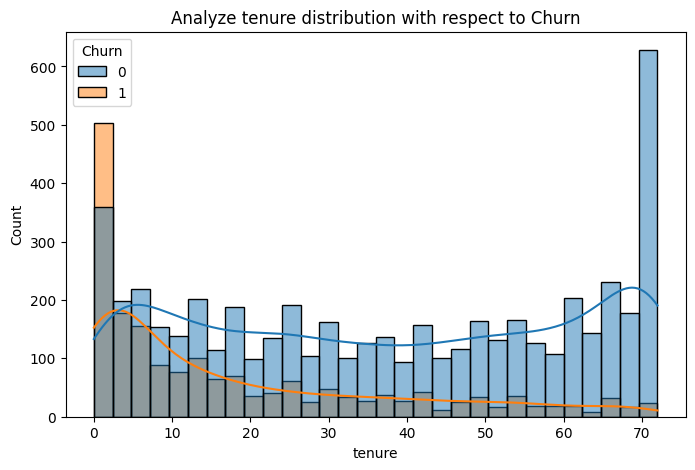

In [11]:
# Analyzing tenure distribution and its relation with churn

plt.figure(figsize=(8,5))
sns.histplot(x='tenure',data=df,hue='Churn',bins=30,kde=True)
plt.title("Analyze tenure distribution with respect to Churn")
plt.show()

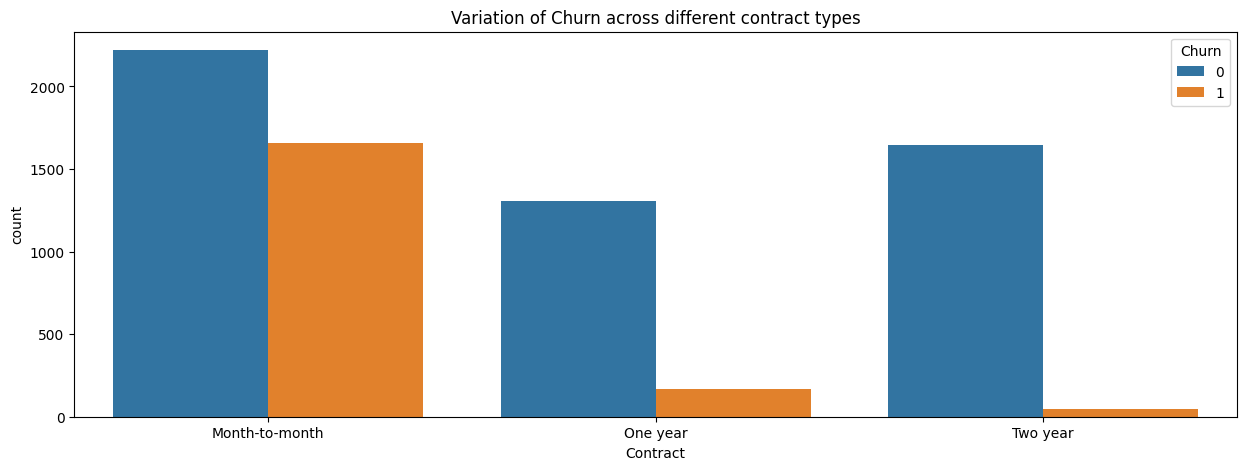

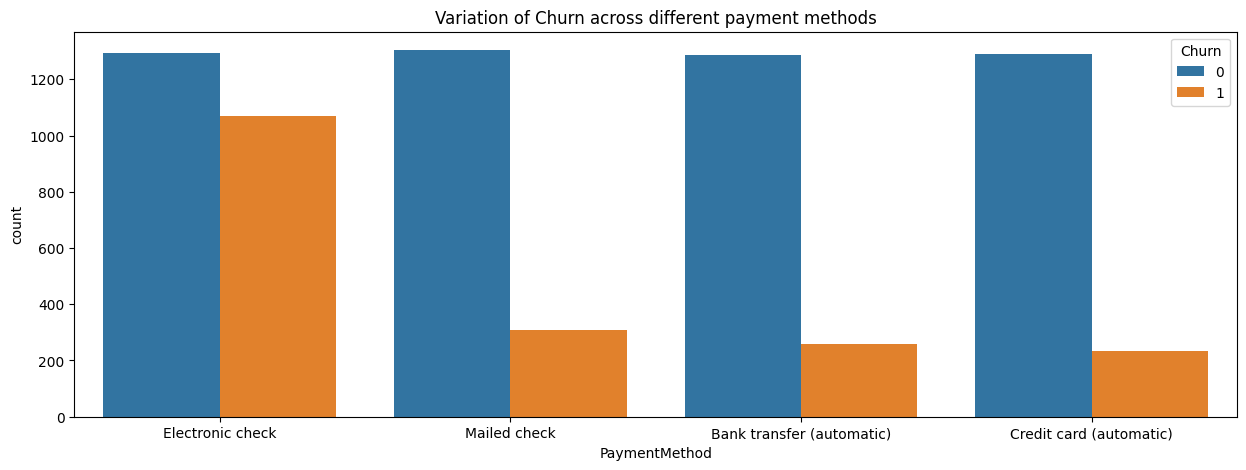

In [12]:
# Variation of Churn across different contract types and payment methods

plt.figure(figsize=(15,5))
sns.countplot(x='Contract',data=df,hue='Churn')
plt.title("Variation of Churn across different contract types")
plt.show()

plt.figure(figsize=(15,5))
sns.countplot(x='PaymentMethod',data=df,hue='Churn')
plt.title("Variation of Churn across different payment methods")
plt.show()

### **Task 3: Customer Segmentation**

In [13]:
# Tenure Segments

print(df['tenure'].max())

df['TenureGroup']=pd.cut(df['tenure'],bins=[0,12,24,48,72],labels=['0-12','13-24','25-48','49-72'],include_lowest=True)


72


In [14]:
# Monthly Charge Segments

print(df['MonthlyCharges'].max())
df['ChargeGroup']=pd.qcut(df['MonthlyCharges'],q=3,labels=['Low','Medium','High'])


118.75


In [15]:
# Analyzing churn rates within Contract type

print("Churn rate by contract type in %")
print((df.groupby('Contract')['Churn'].mean()*100).round(2))

Churn rate by contract type in %
Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Churn, dtype: float64


In [16]:
# Analyzing churn rates within Tenure

print("Churn rate by Tenure in %")
print((df.groupby('TenureGroup')['Churn'].mean()*100).round(2))

Churn rate by Tenure in %
TenureGroup
0-12     47.44
13-24    28.71
25-48    20.39
49-72     9.51
Name: Churn, dtype: float64


/tmp/ipython-input-1061066698.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df.groupby('TenureGroup')['Churn'].mean()*100).round(2))


In [17]:
# Analyzing churn rates within Monthly charges

print("Churn rate by Monthly Charges in %")
print((df.groupby('ChargeGroup')['Churn'].mean()*100).round(2))

Churn rate by Monthly Charges in %
ChargeGroup
Low       15.87
Medium    29.68
High      34.09
Name: Churn, dtype: float64


/tmp/ipython-input-1468798187.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df.groupby('ChargeGroup')['Churn'].mean()*100).round(2))


In [18]:
# Analyzing churn rates for combined factors

print("Churn rate for combined factors in %")
print((df.groupby(['Contract','ChargeGroup','TenureGroup'])['Churn'].mean()*100).round(2).sort_values(ascending=False))

Churn rate for combined factors in %
Contract        ChargeGroup  TenureGroup
Month-to-month  High         0-12           74.59
                Medium       0-12           55.95
                High         13-24          53.85
                             25-48          43.54
                Low          0-12           35.88
                Medium       13-24          34.04
                High         49-72          30.97
One year        High         0-12           28.57
Month-to-month  Medium       25-48          27.38
One year        High         13-24          22.22
                             25-48          21.38
                             49-72          19.20
Month-to-month  Low          13-24          18.99
                             49-72          17.65
One year        Medium       0-12           16.67
Month-to-month  Medium       49-72          15.85
                Low          25-48          13.89
One year        Medium       13-24          11.43
                      

/tmp/ipython-input-2336672108.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print((df.groupby(['Contract','ChargeGroup','TenureGroup'])['Churn'].mean()*100).round(2).sort_values(ascending=False))


In [19]:
# Identifying the high valued rsiky customers

risky=df[(df['Contract']=='Month-to-month') & (df['ChargeGroup']== 'High') & (df['TenureGroup']== '0-12')]
print("High valued customers count is: ",risky.shape[0])
print("Churn rate for these customers is: ", (risky['Churn'].mean()*100).round(2))

High valued customers count is:  370
Churn rate for these customers is:  74.59


### **Task 4: Churn Prediction Model**

In [20]:
# Splitting the data was already completed in Task 1, so we will directly use them.


In [21]:
# Scaling the data before model model training

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [22]:
# Training the models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg=LogisticRegression(max_iter=5000)
log_reg.fit(x_train_scaled,y_train)

dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
# Evaluating multiple models using metrics

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

for model,name in [(log_reg,'Logistic Regression'),(dtree,'Decision Tree')]:
  y_pred=model.predict(x_test_scaled)
  print(f"{name} Performance :")
  print("Accuracy : ",accuracy_score(y_test,y_pred))
  print("Precision : ",precision_score(y_test,y_pred))
  print("Recall : ",recall_score(y_test,y_pred))
  print("F1 Score : ",f1_score(y_test,y_pred))
  print("_"*40)

Logistic Regression Performance :
Accuracy :  0.8069552874378992
Precision :  0.6583850931677019
Recall :  0.5668449197860963
F1 Score :  0.6091954022988506
________________________________________
Decision Tree Performance :
Accuracy :  0.7395315826827538
Precision :  0.5095890410958904
Recall :  0.49732620320855614
F1 Score :  0.503382949932341
________________________________________


In [24]:
# Feature selection

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
rf.feature_importances_

array([0.02171282, 0.1643652 , 0.16929061, 0.20107877, 0.02818106,
       0.0235089 , 0.02006782, 0.00425386, 0.0041096 , 0.0200923 ,
       0.04376705, 0.00826743, 0.00394682, 0.02585236, 0.00478845,
       0.02323118, 0.00518575, 0.01971189, 0.00272666, 0.02407499,
       0.00337754, 0.01665429, 0.00567191, 0.01739215, 0.02097739,
       0.02548376, 0.0257917 , 0.01413217, 0.03992204, 0.01238355])

/tmp/ipython-input-3521338329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")


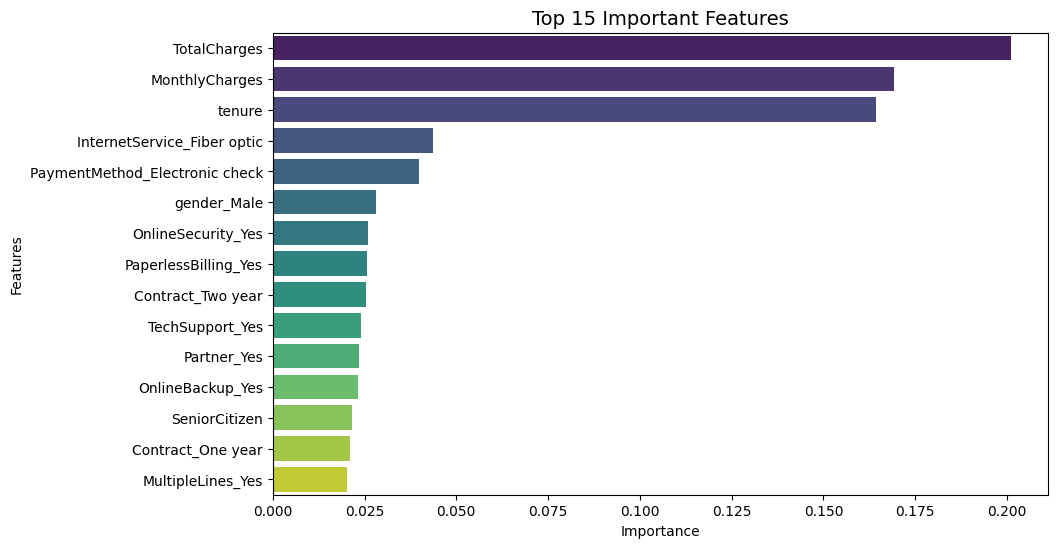

In [26]:
importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
imp_df = importances[:15].reset_index()
imp_df.columns = ["Feature", "Importance"]

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=imp_df, palette="viridis")
plt.title("Top 15 Important Features", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [27]:
best_features=importances[:15].index
x_train_selected=x_train[best_features]
x_test_selected=x_test[best_features]

In [28]:
# Hyperparameter tuning for Logistic regression

from sklearn.model_selection import GridSearchCV
parameter_grid_log={'C':[0.1,0.5,1,5,20,100],'tol':[0.000001,0.0001,0.01,0.1,1,10,100],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],'class_weight':[None,'balanced']}
log_reg_tuned=LogisticRegression()
logistic_grid=GridSearchCV(log_reg_tuned,parameter_grid_log,cv=10)
logistic_grid.fit(x_train_selected,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 20, 100],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [1e-06, 0.0001, 0.01, 0.1, 1, 10, 100]})

In [29]:
print("Best parameters for logistic regression are : ",logistic_grid.best_estimator_)

Best parameters for logistic regression are :  LogisticRegression(C=5, solver='newton-cg', tol=0.01)


In [30]:
# Hyperparameter tuning for Decision Tree

decTree_tuned = DecisionTreeClassifier()
parameter_grid_decTree = {'max_depth':[3,5,10,None],'min_samples_split':[2,5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.1,0.5,1,2,5,10,100],'class_weight':[None,'balanced']}
decTree_grid = GridSearchCV(decTree_tuned, parameter_grid_decTree, cv=5)
decTree_grid.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [0.1, 0.5, 1, 2, 5, 10, 100],
                         'min_samples_split': [2, 5, 10]})

In [31]:
print("Best parameters for Decision Tree are : ",decTree_grid.best_estimator_)

Best parameters for Decision Tree are :  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.1)


In [32]:
# Evaluating multiple models using metrics after Hyperparameter tuning


for model, name in [(logistic_grid.best_estimator_, "Logistic Regression (Tuned)"),
                    (decTree_grid.best_estimator_, "Decision Tree (Tuned)")]:
    y_pred = model.predict(x_test_selected)
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("-"*50)

Logistic Regression (Tuned) Performance:
Accuracy: 0.7977288857345636
Precision: 0.6518771331058021
Recall: 0.5106951871657754
F1 Score: 0.5727136431784108
--------------------------------------------------
Decision Tree (Tuned) Performance:
Accuracy: 0.7821149751596878
Precision: 0.6700507614213198
Recall: 0.35294117647058826
F1 Score: 0.46234676007005254
--------------------------------------------------


##